# PCA-wine dataset


- Perform Principal component analysis 
- Perform heirarchial and k mean clustering using first  3 principal component scores  
- Plot elbow curve and obtain optimum number of clusters 
- Check whether we have obtained same number of clusters with the original data 


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
X = df.drop(columns='Type')

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

### K-Means Clustering

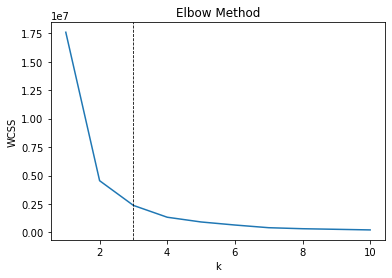

In [14]:
# Finding optimal number of clusters - elbow method
from sklearn.cluster import KMeans
wcss = []
for n_clusters in range(1,11):
    model = KMeans(n_clusters=n_clusters,random_state=42) # kmeans++ init to overcome random initialisation trap
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x=3,color='k',ls='--',lw=0.8)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS');

# optimum nunber of cluster is 3

In [87]:
model = KMeans(n_clusters=3,random_state=42)
cluster = model.fit_predict(X) # model.fit(X) + model.labels_

In [12]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [91]:
def change(x):
    if x==0:
        return 3 
    if x==2:
        return 2
    if x==1:
        return 1

In [ ]:
df['Cluster'] = pd.Series(cluster).apply(change)
df.iloc[100:105,[0,-1]]
df.iloc[0:5,[0,-1]]
df.iloc[173:177,[0,-1]]

In [96]:
df['Cluster'].unique()

array([1, 2, 3], dtype=int64)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(df['Type'],df['Cluster']))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        59
           2       1.00      0.89      0.94        71
           3       0.89      1.00      0.94        48

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.95       178
weighted avg       0.96      0.96      0.95       178



C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


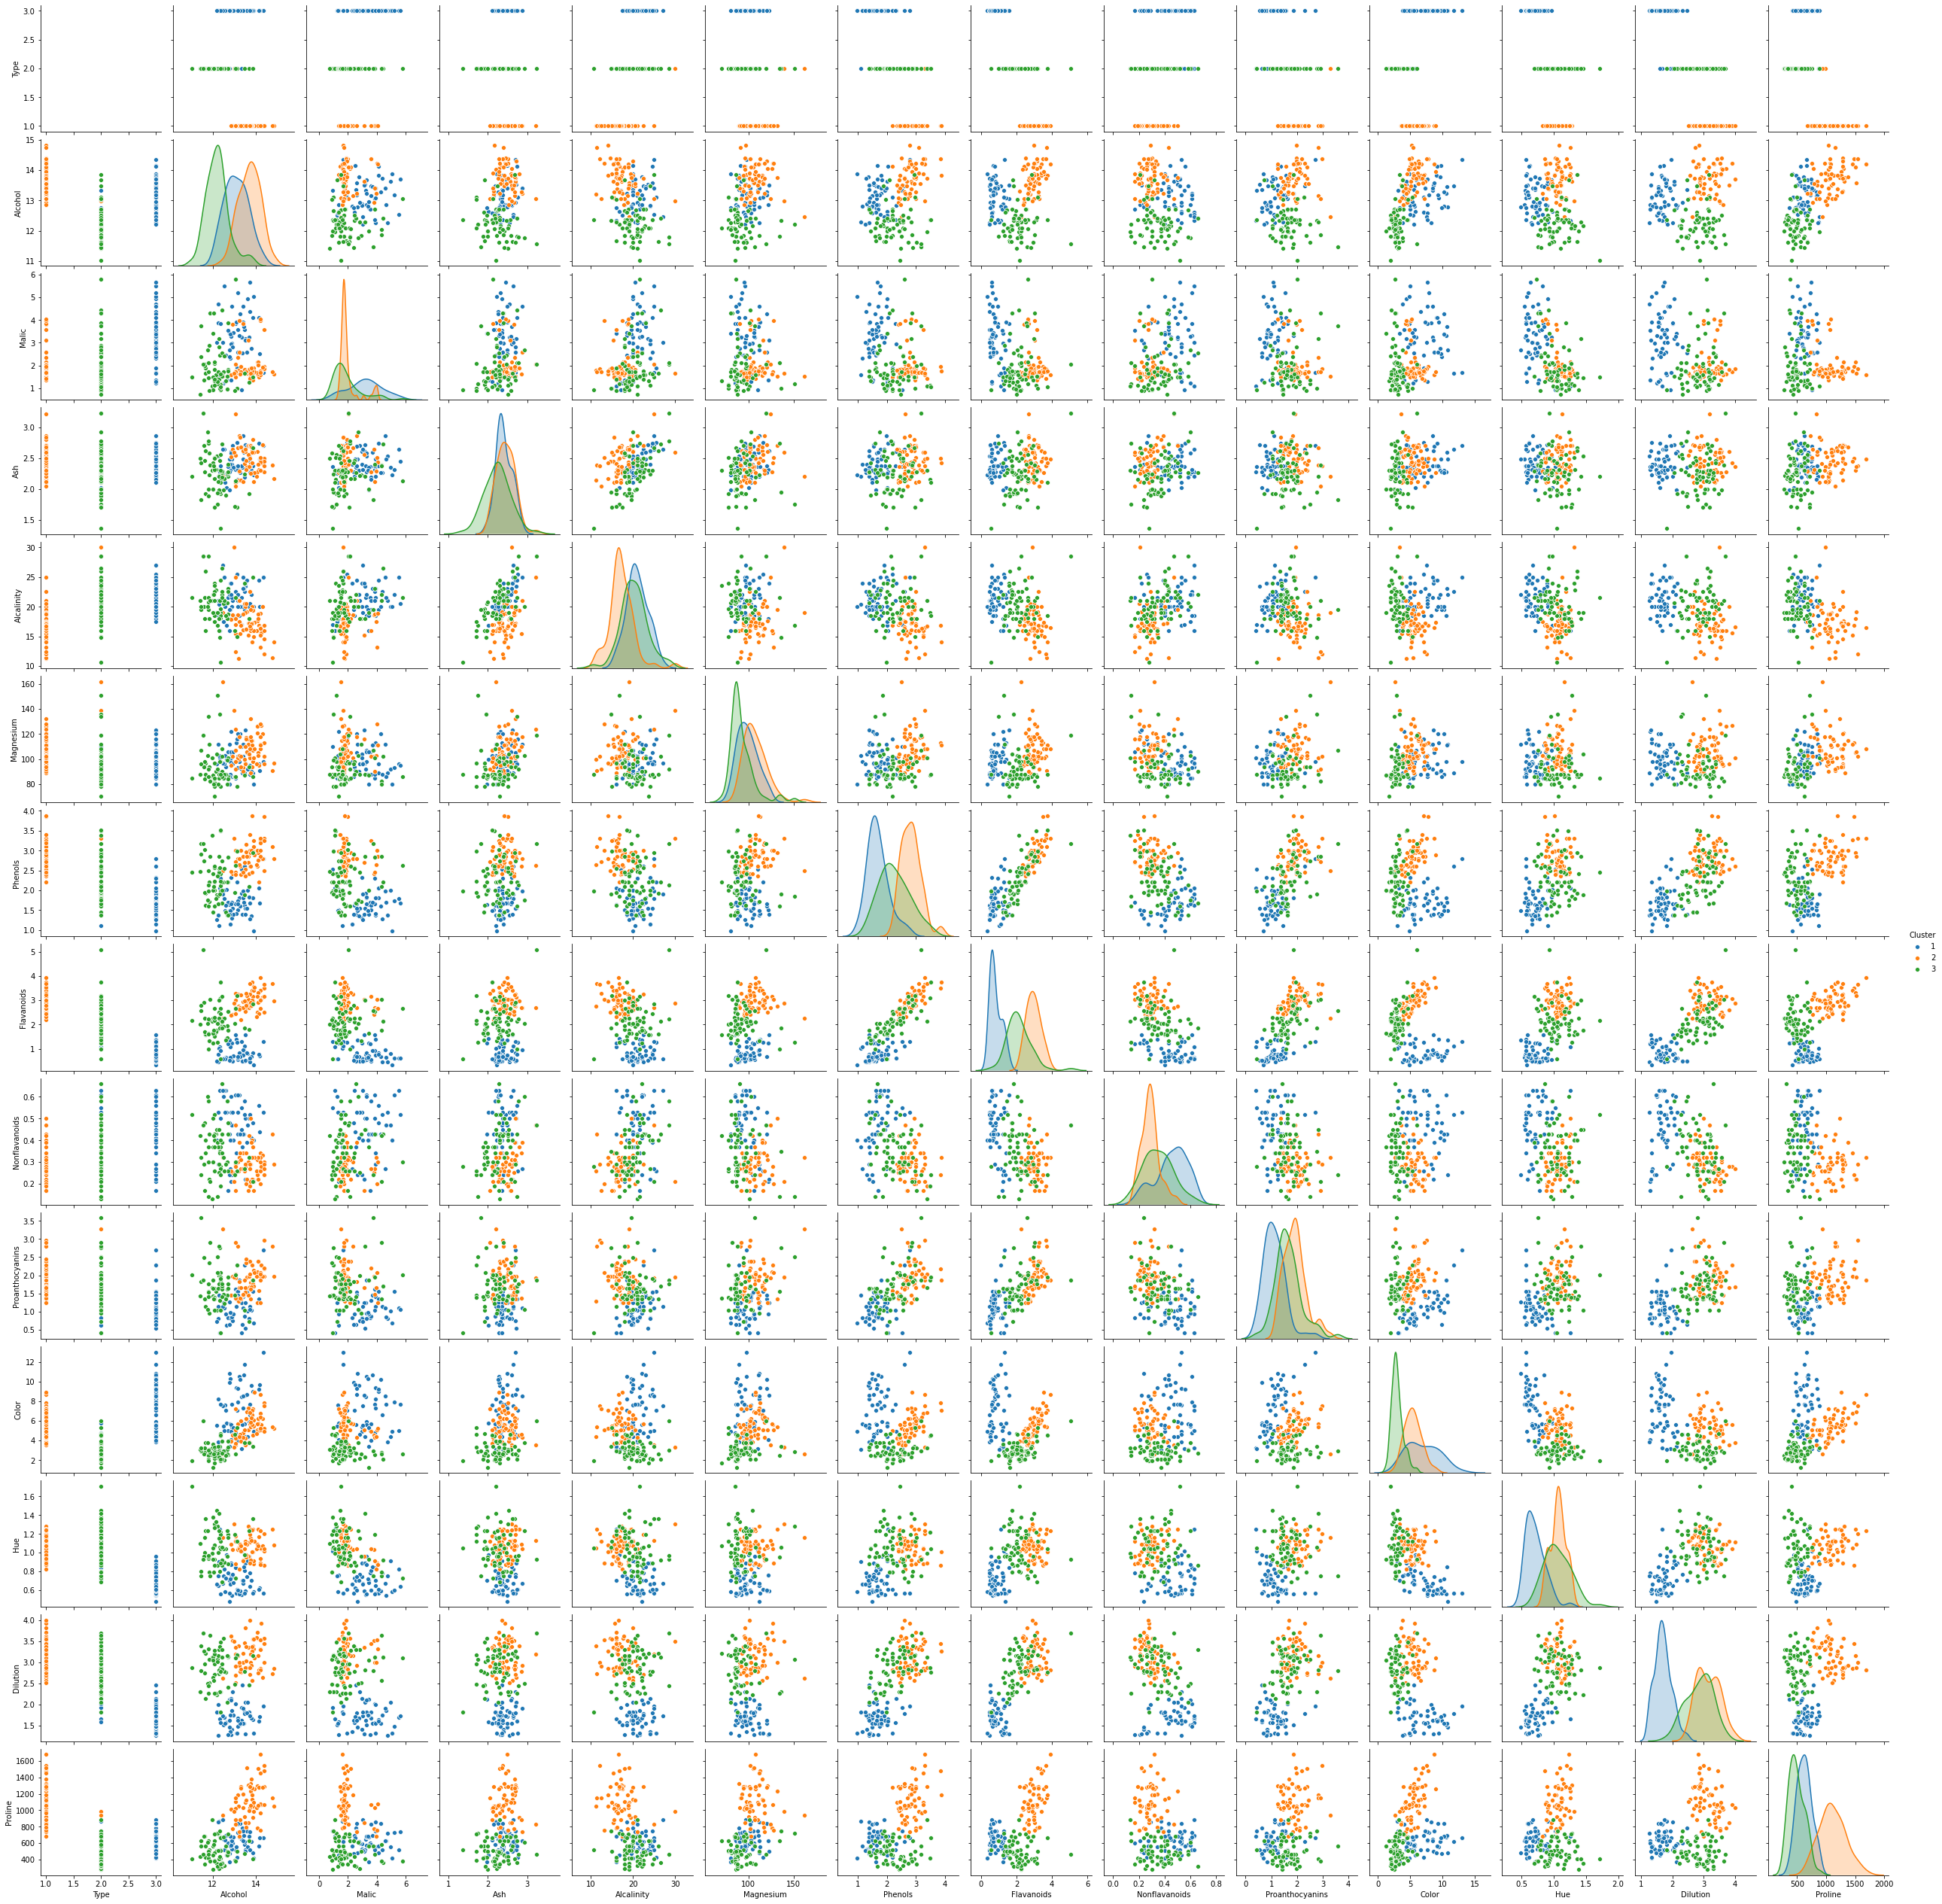

In [29]:
sns.pairplot(data=df,hue='Cluster');

In [ ]:
# We observe the clusters are based majorly on Phenols, flavonoids,color, alcohol and proline features 
# K-means have clustered the data as per type with 96% accuracy

### Hierarchical clustering

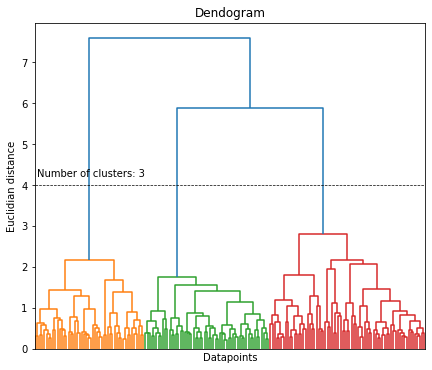

In [11]:
# optimising number of clusters by observing dendrogram

plt.figure(figsize=(7,6))
from scipy.cluster import hierarchy
hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
plt.xlabel('Datapoints')
plt.ylabel('Euclidian distance')
plt.title('Dendogram')
plt.tick_params(axis='x',labelbottom=False)

# We observe number of clusters formed is 3 represented by orange,red and green color on the dendogram (same as in K-Means)

plt.axhline(y=4,ls='--',color='k',lw=0.7)
plt.annotate('Number of clusters: 3',xy=(10,4.2));

In [4]:
# Let's implement hierarchical clustering algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
def change(x):
    if x==0:
        return 2 
    if x==2:
        return 1
    if x==1:
        return 3

In [13]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
cluster = model.fit_predict(X)
df['Cluster'] = pd.Series(cluster).apply(change)
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
df.iloc[173:177,[0,-1]]
df.iloc[0:5,[0,-1]]
df.iloc[100:105,[0,-1]]

,Type,Cluster
100,2,0
101,2,0
102,2,0
103,2,0
104,2,0


In [14]:
from sklearn.metrics import classification_report
print(classification_report(df['Type'],df['Cluster']))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        59
           2       1.00      0.82      0.90        71
           3       0.86      1.00      0.92        48

    accuracy                           0.93       178
   macro avg       0.93      0.94      0.93       178
weighted avg       0.94      0.93      0.93       178



In [ ]:
# Hierarchical clustering gives a performance of 93% accuracy to cluster the data according to type 

When we have too many features, observations become harder to cluster — believe it or not, too many dimensions causes every observation in your dataset to appear equidistant from all the others. 
And because clustering uses a distance measure such as Euclidean distance to quantify the similarity between observations, this is a big problem. 
If the distances are all approximately equal, then all the observations appear equally alike (as well as equally different), and no meaningful clusters can be formed.

## Dimensionality reduction: Principal Component Analysis
Understanding latent features and overcoming the curse of dimensionality
refer: https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e

PCA identifies the patterns, corelation between different variables, find list of principle axis
Highly affected by outliers in the data

Mathematically it exploits the concept of matrix representation as dot product of eigen values and eigen vectors (reduced features)

Try KernelPCA

Refer:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [44]:
X = df.drop(columns='Type')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

In [45]:
# reducing complexity of dataset and implementing clustering

from sklearn.decomposition import PCA
model = PCA(n_components=2,random_state=42)
X = model.fit_transform(X) # for classification use fit_transform method on train set and transform on test to prevent data leakage

In [40]:
X

array([[-8.38001237e-01, -2.50140622e-01],
       [-6.70509284e-01, -7.55548078e-03],
       [-6.95250204e-01, -1.87518551e-01],
       [-9.24036602e-01, -5.76848746e-01],
       [-4.55131366e-01, -6.03945893e-02],
       [-7.66549001e-01, -4.85331760e-01],
       [-7.18768010e-01, -2.98562110e-01],
       [-6.67980217e-01, -2.97189646e-01],
       [-6.82183112e-01, -3.06181103e-01],
       [-7.73904385e-01, -2.03744057e-01],
       [-8.56032953e-01, -3.53350678e-01],
       [-5.89575860e-01, -2.25095672e-01],
       [-6.44496022e-01, -2.31014405e-01],
       [-7.81643814e-01, -3.52888432e-01],
       [-9.37651393e-01, -5.34003471e-01],
       [-6.63144392e-01, -3.36314232e-01],
       [-6.28401834e-01, -4.50059186e-01],
       [-5.81994736e-01, -3.15453014e-01],
       [-8.51929333e-01, -5.90871312e-01],
       [-6.46400785e-01, -1.74519609e-01],
       [-7.99992782e-01, -1.24985760e-01],
       [-5.02045064e-01,  9.51550783e-03],
       [-7.59465188e-01,  2.87763885e-03],
       [-6.

In [46]:
model = KMeans(n_clusters=3,random_state=42)
cluster = model.fit_predict(X) # model.fit(X) + model.labels_

In [47]:
df['Cluster'] = pd.Series(cluster)

In [15]:
print(df.iloc[173:177,[0,-1]],'\n', df.iloc[0:5,[0,-1]], '\n', df.iloc[100:105,[0,-1]])

     Type  Cluster
173     3        1
174     3        1
175     3        1
176     3        1 
    Type  Cluster
0     1        0
1     1        0
2     1        0
3     1        0
4     1        0 
      Type  Cluster
100     2        2
101     2        2
102     2        2
103     2        2
104     2        2


In [48]:
def change(x):
    if x==0:
        return 1 
    if x==2:
        return 2
    if x==1:
        return 3

df['Cluster'] = pd.Series(cluster).apply(change)

from sklearn.metrics import classification_report
print(classification_report(df['Type'],df['Cluster']))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        59
           2       1.00      0.87      0.93        71
           3       0.94      1.00      0.97        48

    accuracy                           0.95       178
   macro avg       0.95      0.96      0.95       178
weighted avg       0.95      0.95      0.95       178



In [ ]:
# After reducing the dimensions from 13 to 2, we still end up getting a reasonable accuracy of 95% using K-Means
# Let's now analyse the same on hierarchical clustering

In [17]:
model = AgglomerativeClustering(n_clusters=3)
cluster = model.fit_predict(X)

In [18]:
df['Cluster'] = pd.Series(cluster)

In [19]:
print(df.iloc[173:177,[0,-1]],'\n', df.iloc[0:5,[0,-1]], '\n', df.iloc[100:105,[0,-1]])

     Type  Cluster
173     3        2
174     3        2
175     3        2
176     3        2 
    Type  Cluster
0     1        0
1     1        0
2     1        0
3     1        0
4     1        0 
      Type  Cluster
100     2        1
101     2        1
102     2        1
103     2        1
104     2        1


In [20]:
def change(x):
    if x==0:
        return 1 
    if x==2:
        return 3
    if x==1:
        return 2

df['Cluster'] = pd.Series(cluster).apply(change)

from sklearn.metrics import classification_report
print(classification_report(df['Type'],df['Cluster']))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        59
           2       0.98      0.80      0.88        71
           3       0.98      0.98      0.98        48

    accuracy                           0.92       178
   macro avg       0.93      0.93      0.92       178
weighted avg       0.93      0.92      0.92       178



In [32]:
model.components_

array([[-0.1081788 ,  0.18610904, -0.00628672,  0.13785175, -0.06719863,
        -0.29590379, -0.31681889,  0.24003419, -0.18354595,  0.08088929,
        -0.19928789, -0.36345085, -0.23112226,  0.64737234],
       [-0.55002154, -0.22937314, -0.16329101,  0.07846523, -0.18742801,
        -0.07090616,  0.00218737, -0.01311912, -0.02911155, -0.51998798,
         0.23878838,  0.21909913, -0.44206694,  0.00521552]])

In [49]:
# Visualisation
X = pd.DataFrame(data=X,columns=['PCA_1','PCA_2'])
X['Cluster'] = pd.Series(cluster).apply(change)
X

,PCA_1,PCA_2,Cluster
0,-0.838001,-0.250141,1
1,-0.670509,-0.007555,1
2,-0.695250,-0.187519,1
3,-0.924037,-0.576849,1
4,-0.455131,-0.060395,1
...,...,...,...
173,0.907995,-0.474923,3
174,0.792579,-0.350006,3
175,0.828900,-0.548720,3
176,0.786041,-0.427088,3


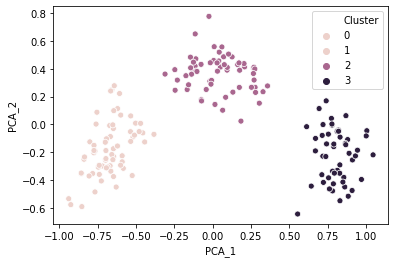

In [55]:
sns.scatterplot(data=X,x='PCA_1',y='PCA_2',hue='Cluster');
# K-Means clustering visualisation

In [ ]:
# For hierarchical clustering + PCA where dimensions where reduced to 2 from 13
# Still an accuracy of 92% was obtained

# Thank you!